# **Neural Network and its application Tutorial in Python**
###### Created by **(Satvik Tiwari)** for DA623 
---


# Overview

We will cover the following topics in this notebook.


*   Theory of how Perceptrons work and Learn
*   Coded Walkthrough of a Neural Network
*   Model the Wisconsin Breast Cancer Dataset
*   Review Various Applications of Neural Networks

So stay tuned!



# What Are Neural Networks?


In simple terms, neural networks are representative of the human brain, and they are specificially made to recognize patterns. They interpret data through various models. The patterns that these models detect are all numerical specifically in the form of vectors. 

Neural networks are extremely helpful for performing tasks involving clustering and classification. Because of the networks similarity to the human brain, it is able to recognize patterns in unlabeled data.

We will start off by investigating the most basic Neural Network: **The Perceptron**

## Perceptrons

<img src="https://tinyurl.com/ybcfd78e" alt="perceptron" width="400"/>





The Perceptron consists of two main components
1.   Neurons ($x_i$)
2.   Weights ($w_i$)

Perceptrons represent the most basic form of a Neural Network with only two layers, the input and output layer.  As shown in the diagram above, both layers are joined by weights represented by the arrows. Each individual neuron represents a number. For example, if there are three inputs, the input layer will consist of 3 neurons plus an additional bias neuron. The importance of the bias ($b$) will become clear later in this tutorial. The output layer simply consists of one neuron in this scenario which represents the number we are attempting to predict. 




**Forward Propagation**

The process of going from the input layer to the output is known as Forward Propagation. To simplify the computations, we will use vector notation to represent the input features and the weights.

  $\vec{x}=\begin{bmatrix}  x_1 & x_2 & ... & x_n\end{bmatrix}$


  $\vec{w}=\begin{bmatrix}  w_1 & w_2 & ... & w_n \end{bmatrix}$

  Finally, to get the value of the output neuron, we simply take the dot product of these two vectors and add the bias. 

  $z=\vec{x}\cdot\vec{w}+b=x_1\times w_1+x_2\times w_2+...+x_n\times w_n+b$






**The Bias Term**

To get a better understanding of this output, lets analyze it with just one input neuron. In other words, our output neuron will store the following.

$z=x_1\times w_1+b$

If we visualize this in two dimensional space, we know that this will represent a line with slope $w_1$ and intercept $b$. We can now easily see the role of the bias. Without it, our model would always go through the origin. Now, we can shift our model along the axes giving us more flexibility while training. However, we are still only able to represent linear models. To add non-linearities to our model we use an activation function.



**Activation Functions**

Lets imagine that we are solving a binary classification problem. This means the range of our output $\hat{y}$ (predicted value) must be $(0, 1)$ since we are predicting a probablity that the input belongs to a certain class. However, the range of a linear equation is $(-\infty, \infty)$. Therefore, we must apply some other function to satisfy this constraint. In binary classification problems, the most common activation function is called the sigmoid function. 

$\sigma(x)=\frac{1}{1+e^{-x}}$


<img src="https://tinyurl.com/ycggxehs" alt="sigmoid_graph" width="400"/>



As you can see in this graph, $\sigma(x)\in(0, 1)$. This activation function makes it possible to predict a probablity for a binary output. As you go further into machine learning, you will see several other activation functions. The most common ones other than sigmoid are ReLU, tanh, and softmax.


**The Output**

Now that we know all the parts of the perceptron, let's see how to get the final output. After forward propagation, we saw the output was

  $z=\vec{x}\cdot\vec{w}+b=x_1\times w_1+x_2\times w_2+...+x_n\times w_n+b$

Finally, we must apply the activation function to get our final output.

$\hat{y}=\sigma(z)$

That is all there is to get the output from a perceptron! To sum it up in three simple steps:



1.   Get the dot product of the weights and the input features $(\vec{x}\cdot\vec{w})$.
2.   Add the bias $(\vec{x}\cdot\vec{w}+b)$.
3.   Apply the activation function and that is the predicted value $(\hat{y}=\sigma(\vec{x}\cdot\vec{w}+b))$!

So far we know how to take the input values and return the corresponding output. However, we must adjust the weights to make the network fit the training data. The process of making these adjustments is known as **back propagation**.



In order to adjust our weights, first we must figure out a way to numerically signify the accuracy of our prediction. In other words, we need to figure out how close our predicted value is to the actual value. A simple way to do this is to use the **Sum of Squares Error**.

$\mathcal{L}(y, \hat{y})=(y-\hat{y})^{2}$

Although this function works, most real-life applications will not use this error function. We will discuss another group of cross entropy loss functions. 


**Loss Function**

Several functions exist for accomplishing this task, however, the most common loss function for binary problems is called **Binary Cross-Entropy**.

$\mathcal{L}(y, \hat{y})=-(y\log(\hat{y}) + (1-y)\log(1-\hat{y}))$

Where $y$ is the actual value (0 or 1) and $\hat{y}$ is the predicted probability. Looking closer at this equation, we can see that the first term will cancel out if $y=0$, and similarly the second term will cancel out if $y=1$. Therefore, we can write the same equation as a piecewise function.

$\mathcal{L}(y, \hat{y})=\begin{cases}-\log(1-\hat{y}) & \text{if $y=0$} \\-\log(\hat{y}) & \text{if $y=1$}\end{cases}$

Keep in mind that $\hat{y}$ is a decimal value in the range $(0, 1)$. The $\log$ function returns a negative number for such values. As a result, we must take the negative of the log to return a positive value. 

To see why this function works as the error, try experimenting in the next code cell with different values of $y$ and $\hat{y}$ then analyze the corresponding loss function value.

In [1]:
import numpy as np
def binary_crossentropy(y, yhat):
  #code is derived from the piecewise function
  if y == 0:
    return -np.log(1.0-yhat)

  if y == 1:
    return -np.log(yhat)

y = 0 
yhat = 0.05 

print(f'Loss: {binary_crossentropy(y, yhat)}')


Loss: 0.05129329438755058


**Back Propogation**

To simplify this process, we will show back propagation with the Sum of Squares error as our loss function. 

$\mathcal{L}(y, \hat{y})=(y-\hat{y})^{2}$

Keep in mind that our goal is to find the global minimum of the loss concerning our weights. To update our weights, we first need to find out how much a small change in the weight will affect our loss function. In other words, this is what we need to find:

$\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w}$

However, we cannot find the derivative of $(y-\hat{y})^2$ with respect to $w$ if it does not exist in the expression. Fortunately, we can use the chain rule to overcome this obstacle. 

$\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w} = \frac{\partial \mathcal{L}(y, \hat{y})}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial{z}} * \frac{\partial z}{\partial w}$

As a reminder, during forward propagation, we defined $z=w \cdot x+b$. The expanded expression can easily be simplified. 

$\frac{\partial \mathcal{L}(y, \hat{y})}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial{z}} * \frac{\partial z}{\partial w} = -2(y-\hat{y}) * \sigma(z)(1-\sigma(z)) * x$

The first term, $-2(y-\hat{y})$, and the last term, $x$, are pretty easy to derive. The middle term requires us to take the derivative of the sigmoid function. We will not derive it here, but the sigmoid derivative can be cleanly written in terms of the sigmoid function itself as:

$\sigma^\prime(x)=\sigma(x)(1-\sigma(x))$

The value of $\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w}$ that we solved for, gives us the value that we call a gradient. Now, we will see the graphical interpretation. 



In the graph below, the $x$-axis represents the weight, and the $y$-axis represents the function J, which is any arbitrary loss function. The value we solved for the above is called the gradient, or in simpler terms, it is the slope of the tangent line at a point. Our end goal is to reach the global cost minimum since it is the point where the loss is minimized. Here is the algorithm that we will repeat several times to achieve this task. 

$w = w-\frac{\partial \mathcal{L}(y, \hat{y})}{\partial w}$



**Artificial Neural Networks**

Artificial Neural Networks (ANN) are very similar to Perceptrons except they have one extra layer. The figure below shows an example of the ANN. The input and output layers do not change. The layer in the middle is called the hidden layer. Before, we only had one weight matrix, connecting the input to the output. Now, we have an extra set of connections. 

Here is what the two-weight matrices would look like in the figure below.

$W_1=
\begin{bmatrix} 
w_{1,1} & w_{1,2} & w_{1,3} & w_{1, 4} & w_{1, 5}\\
w_{2,1} & w_{2,2} & w_{2,3} & w_{2, 4} & w_{2, 5}\\
w_{3,1} & w_{3,2} & w_{3,3} & w_{3, 4} & w_{3, 5}      
\end{bmatrix}
$

Here $W_1$ represents the connections from the input layer to the hidden layer. Notice that the number of rows is the number of neurons in the input layer and the number of columns is the number of neurons in the hidden layer. 

$W_2=
\begin{bmatrix} 
\beta_{1,1} & \beta_{1,2}\\
\beta_{2,1} & \beta_{2,2}\\
\beta_{3,1} & \beta_{3,2}\\     
\beta_{4,1} & \beta_{4,2}\\ 
\beta_{5,1} & \beta_{5,2}\\  
\end{bmatrix}
$

$W_2$ is a matrix storing the weights ($\beta$) connecting the hidden layer to the output layer. There are two columns since the output layer in the image has 2 output neurons. 



# Code

The following code is us building a neural network from scratch on the Wisconsin Breast Cancer dataset. 

## Imports

We begin the neural network here by importing some necessary libraries that will allow us to actually create the artificial NN, and also display what goes on internally to maximize the accuracy of the NN.

What is the purpose of each library?

  - From the sklearn library, we import the breast cancer dataset. 
  - We import matplotlib, pandas, and numpy which help us organize and visualize the data and outputs. 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

iris
stegan
stock-time-series-20050101-to-20171231
suniward



## Loading Dataset, Preprocessing 

In [3]:
# load iris database
data = pd.read_csv('../input/iris/Iris.csv')
data.sample(n=5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
19,20,5.1,3.8,1.5,0.3,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor
25,26,5.0,3.0,1.6,0.2,Iris-setosa
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


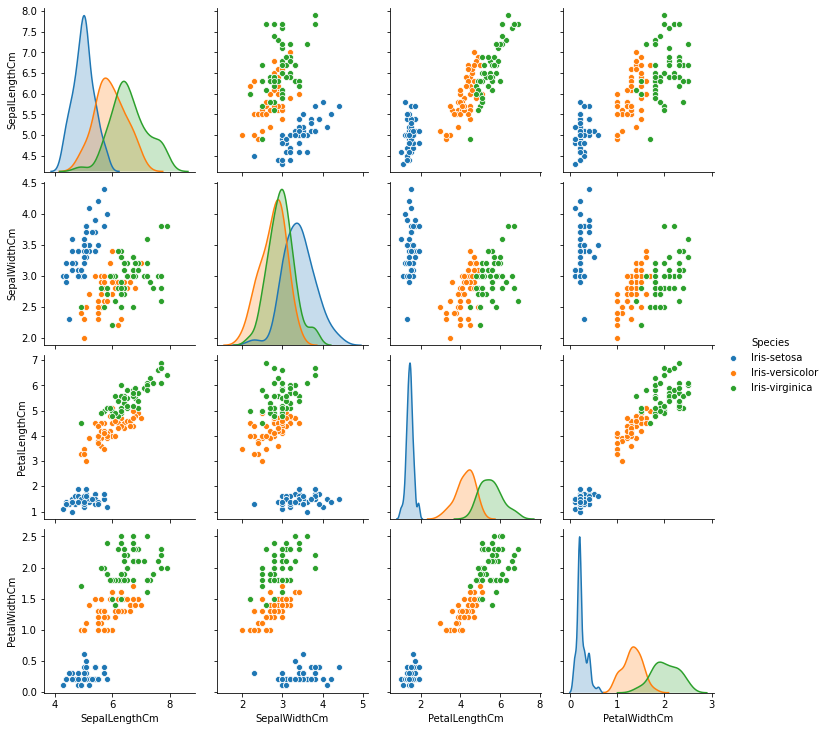

In [5]:
# simple visualization to show how the inputs compare against each other
sns.pairplot( data=data, vars=('SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'), hue='Species' )

# Normalize the data

In [6]:
df_norm = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
23,0.222222,0.541667,0.118644,0.166667
26,0.194444,0.583333,0.101695,0.125000
32,0.250000,0.875000,0.084746,0.000000
19,0.222222,0.750000,0.084746,0.083333
79,0.388889,0.250000,0.423729,0.375000


In [7]:
df_norm.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


Convert the Species labels to indexes for use with neural network.
Iris-setoso = 0
Iris-versicolor = 1
Iris-virginica = 2

In [8]:
target = data[['Species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(n=5)

,Species
14,0
12,0
17,0
131,2
2,0


In [9]:
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
111,0.583333,0.291667,0.728814,0.750000,2
11,0.138889,0.583333,0.101695,0.041667,0
55,0.388889,0.333333,0.593220,0.500000,1
81,0.333333,0.166667,0.457627,0.375000,1
79,0.388889,0.250000,0.423729,0.375000,1


# Mark some of the data for testing purpose.

In [10]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,train
38,0.027778,0.416667,0.050847,0.041667,0,True
113,0.388889,0.208333,0.677966,0.791667,2,True
121,0.361111,0.333333,0.661017,0.791667,2,True
17,0.222222,0.625000,0.067797,0.083333,0,True
111,0.583333,0.291667,0.728814,0.750000,2,True


# Separate train and test Data

In [11]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
101,0.416667,0.291667,0.694915,0.750000,2
14,0.416667,0.833333,0.033898,0.041667,0
15,0.388889,1.000000,0.084746,0.125000,0
86,0.666667,0.458333,0.627119,0.583333,1
76,0.694444,0.333333,0.644068,0.541667,1


In [12]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,0.166667,0.208333,0.593220,0.666667,2
40,0.194444,0.625000,0.050847,0.083333,0
24,0.138889,0.583333,0.152542,0.041667,0
125,0.805556,0.500000,0.847458,0.708333,2
6,0.083333,0.583333,0.067797,0.083333,0


In [13]:
X = train.values[:,:4]
X[:5]

array([[0.13888889, 0.41666667, 0.06779661, 0.08333333],
       [0.80555556, 0.41666667, 0.81355932, 0.625     ],
       [0.75      , 0.5       , 0.62711864, 0.54166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.55555556, 0.54166667, 0.62711864, 0.625     ]])

In [14]:
targets = [[1,0,0],[0,1,0],[0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,4:5]])
y[:5]

array([[1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0]])

# Create backpropagating neural network

<H2>Create backpropagating neural network</H2>
Create 3 layers: Input, hidden and Output.

Inputs = length and widths of the species<BR>
Output = 3 values, each one indicating a species. ie Values 1, 0, 0 for the output indicates Iris-setosa<BR>
w1 is a matrices of weight connecting Input and the hidden layer. Each node in input layer connects to each node in the hidden layer.

Weight are randomized between -1 and 1.

In [15]:
num_inputs = len(X[0])
hidden_layer_neurons = 5
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765],
       [-0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694],
       [ 0.55876584, -0.60462985,  0.72598647,  0.96680135, -0.67231552],
       [ 0.19466789, -0.9820278 , -0.22685743, -0.91167988,  0.91330594]])

w2 are the weights of connections between hidden layer and output layer

In [16]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[-0.12770671,  0.89795461,  0.57261197],
       [ 0.7325786 , -0.65366916, -0.85010283],
       [ 0.20148544, -0.66405563,  0.46676034],
       [-0.18311228,  0.05581765,  0.87514317],
       [ 0.04339224, -0.78361323, -0.68355319]])

<H2>Train the network by updating the weights using backpropogation.</H2>
This is the crux of the network. The layers are fed forward using sigmoid activation function. The weighs are then updated based on error using gradient descent.

<pre>
Forward Propagation ( use current weights to caluculate output ):
> node activation = output from previous layer (network inputs in case of first layer) * weights
> node output = sigmoid activation function = 1 / ( 1 + exp( node activation ) )

Backpropagation ( update network weights ):
Error calculation ( how far off we are from the expected values ):
> derivative (different for different activation functions) = output * ( 1 - output )
> error (for the last layer) = ( expected - output ) * derivative
> error (for other layers) = ( error calulated previously * that layer's weight ) * derivative
Update weight based on error caculated:
> Weight = weight + ( output * error * learning rate )
</pre>

In [17]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

**A Graphical representations of our network will be something like below**<BR>
The first set of 4 nodes is the input.<BR>
The second set of 5 nodes is the hidden layer. <BR>
The last set of 3 nodes is the output layer.<BR><BR>
All the nodes of a layer are fully connected to all nodes of the next layer.

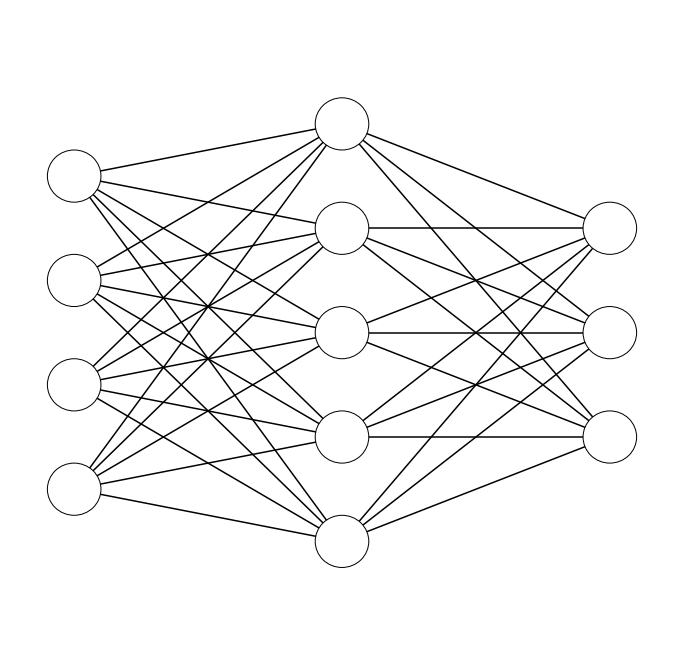

In [18]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [4, 5, 3])


The sigmoid activation function squashes the input values between 0 and 1. This provides a consistant way for the network to deal with outputs.

In [19]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )

# Training

In [20]:
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use use square as well
    er = (abs(y - l2)).mean()
    error.append(er)
    
    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # udpate weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate
    
print('Error:', er)

Error: 0.10346535305277953


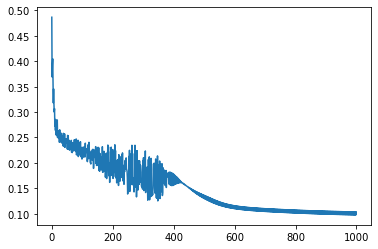

In [21]:
plt.plot(error)

# Test the network for accuracy.

In [22]:
X = test.values[:,:4]
y = np.array([targets[int(x)] for x in test.values[:,4:5]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

array([[0.998, 0.001, 0.007],
       [0.998, 0.004, 0.001],
       [0.998, 0.001, 0.005],
       [0.998, 0.   , 0.009],
       [0.999, 0.001, 0.005],
       [0.998, 0.001, 0.003],
       [0.002, 0.98 , 0.004],
       [0.003, 0.998, 0.   ],
       [0.014, 1.   , 0.   ],
       [0.   , 0.135, 0.862],
       [0.   , 0.737, 0.297],
       [0.   , 0.773, 0.437],
       [0.   , 0.838, 0.379],
       [0.   , 0.529, 0.625],
       [0.003, 0.991, 0.001],
       [0.001, 0.942, 0.019],
       [0.   , 0.736, 0.196]])


From the above maxtrix we take the maximum value (per row), which forms our predictions...

In [23]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['Species']].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction'].replace([0,1,2], ['Iris-setosa','Iris-versicolor','Iris-virginica'])

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

             Species       Prediction
6        Iris-setosa      Iris-setosa
24       Iris-setosa      Iris-setosa
35       Iris-setosa      Iris-setosa
40       Iris-setosa      Iris-setosa
42       Iris-setosa      Iris-setosa
49       Iris-setosa      Iris-setosa
61   Iris-versicolor  Iris-versicolor
63   Iris-versicolor  Iris-versicolor
91   Iris-versicolor  Iris-versicolor
100   Iris-virginica   Iris-virginica
103   Iris-virginica  Iris-versicolor
106   Iris-virginica  Iris-versicolor
108   Iris-virginica  Iris-versicolor
122   Iris-virginica   Iris-virginica
125   Iris-virginica  Iris-versicolor
137   Iris-virginica  Iris-versicolor
149   Iris-virginica  Iris-versicolor
Correct: 11 / 17 : 64.70588235294117 %


<a id="19"></a> <br>
# L Layer Neural Network or Deep Neural Network
* **What happens if number of hidden layer increase:** Earlier layerls can detect simple features.
* When model composing simple features together in later layers of neural network that it can learn more and more complex functions. For example, lets look at our sign one.
<a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
* For example first hidden layer learns edges or basic shapes like line. When number of layer increase, layers start to learn more complex things like convex shapes or characteristic features like forefinger.
* Lets create our model
    * There are some hyperparameters we need to choose like learning rate, number of iterations, number of hidden layer, number of hidden units, type of activation functions. Woww it is too much :)
    * These hyperparameters can be chosen intiutively if you spend a lot of time in deep learning world.
    * However, if you do not spend too much time, the best way is to google it but it is not necessary. You need to try hyperparameters to find best one.



    
    

# Deep Neural Network on Fashion MNIST data. <a class="anchor" id="dnn"></a>
Now, it's time to work on a real data and build a more robust deep neural network.
We will use the Fashion MNIST dataset for our purpose.<br>
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.
Each example is a 28×28 grayscale image, associated with a label from 10 classes.

In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
mnist_fashion = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = mnist_fashion.load_data()

# split training set into training set and validation set using train_test_split provided by scikit-learn 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=77)

num_classes = 10   # The items in the dataset are to be classified into 1 of the 10 classes.

print(x_train.shape, x_val.shape, x_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


Plot some sample images from the dataset.

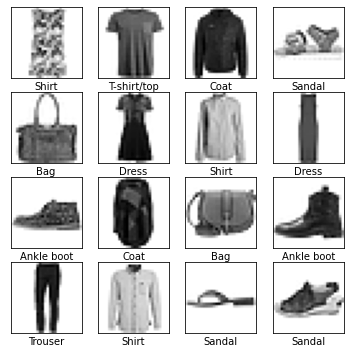

In [25]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

### Build a deep neural network on this dataset. <a class="anchor" id="bdnn"></a>

In [26]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

metrics = ['accuracy','precision','recall']

model = Sequential()
model.add(Flatten())  # This function flattens the input data

# Feel free to play around with different parameters here like number of units in each layer or switching the activation function or increasing/decreasing the number of layers.
model.add(Dense(512, activation='relu'))    

model.add(Dense(256, activation='relu')) 

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))   # The number of units in the last layer should always be the number of classes in which we have to classify our input data.

In [27]:
model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])

### Training

In [28]:
batch_size = 128
epochs = 50

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))  # You can set verbose to 1 to get the status of your model training, 2 to get one line per epoch, here I kept it 0 to keep the notebook precise. 

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.5199 - accuracy: 0.8770
Train: 0.935, Test: 0.877


# Plot the training history visualisation 

In [29]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

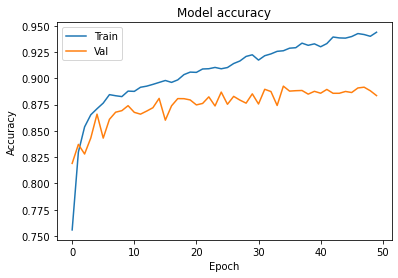

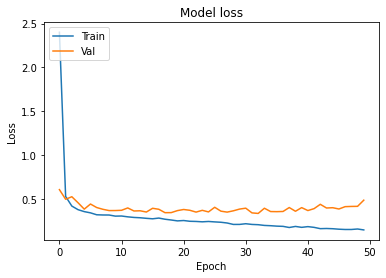

In [30]:
plot_history(history)

#### Seems the model is overfitting here. An ideal loss plot should look similar to this.
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQHXfXuIksn-3ejS8UFeawUppJTmN2endFI6w&usqp=CAU" width="460px" align="center">

#### But at least we have managed to build our first deep neural network.

# Managing Model Overfitting! <a class="anchor" id="mmo"></a>

Now that we have trained our very first model, it's time to optimise the model training dealing with the problem of overfitting. 

Overfitting could be handled in many ways. Some most common ways we will see here include:
* Weight Regularization
* Dropout
* Early Stopping or Callbacks

### Weight Regularization <a class="anchor" id="wr"></a>

One of the most common way is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.

Weight regularization could be done with 2 different techniques:
  * L1 regularization or Lasso Regression
  * L2 regularization or Ridge Regression
  
In tf.keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

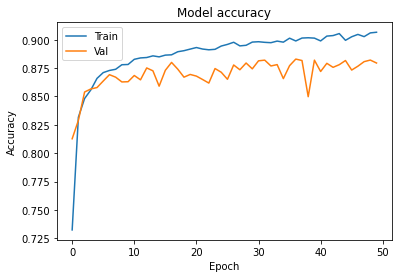

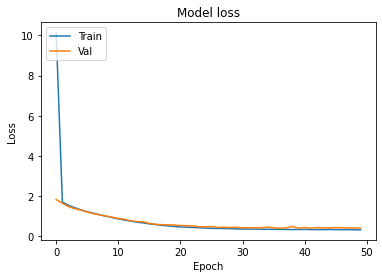

313/313 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.8704
Train: 0.915, Test: 0.870


In [31]:
from  tensorflow.keras import regularizers

# Build the model
model = Sequential()
model.add(Flatten())

# Add l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(Dense(10, activation='softmax'))

# Compile the model created above.
model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])


# Fit the model created above to training and validation sets.
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

# Call the plot_history function to plot the obtained results
plot_history(history)

# Evaluate the results
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### Dropout <a class="anchor" id="drop"></a>

Dropout is another most commonly used regularization techniques for neural networks.<br>
Dropout, applied as a hidden layer, randomly drops out a number of output features of the layer during training.<br>

The "dropout rate" is the fraction of the features that are being dropped; it is usually set between 0.2 and 0.5.

At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

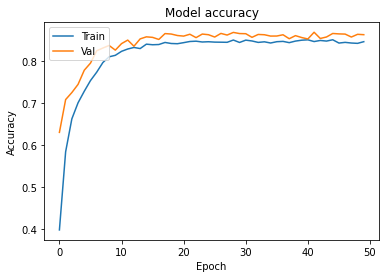

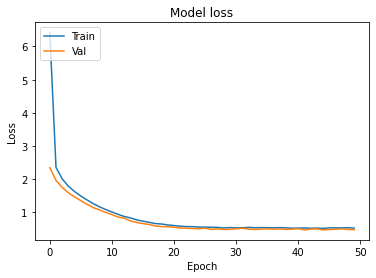

313/313 [==============================] - 1s 2ms/step - loss: 0.5077 - accuracy: 0.8555
Train: 0.878, Test: 0.855


In [32]:
from tensorflow.keras.layers import Dropout

# Build the model
model = Sequential()
model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))   # Add a dropout layer with 0.3 probability
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))   # Add a dropout layer with 0.3 probability
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))   # Add a dropout layer with 0.3 probability
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax'))
 
model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_val, y_val))

plot_history(history)

_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

### Early Stopping <a class="anchor" id="es"></a>

The training could be stopped at an epoch where there isn't any improvement of accuracy or loss for a specific number of rounds. These specific number of rounds is called 'patience'. Even if we declare a total of 1,000 epochs, the training will stop according to the patience once it finds no improvement in the accuracy.<br>


# Applications

In this section, we will cover some applications of neural networks. These will be 


*   Medicine
*   Robotics
*   Finance
*   Understanding Natural Language




## Medicine 

There are many applications of ML/DL to medicine and I will name and describe a few here. 

### Disease Identification

Disease identification is an important sub-field of AI and Medicine. It works by collecting a set of images(generally by scraping the web, or datasets such as this [one](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) on Kaggle) and training a more specific neural network known as a convolutional neural network(CNN). CNN's are extremely accurate and are made for image recognition and identification tasks. 

The founder of StartOnAI, Sid Sharma, recently wrote a paper called ["DermaDetect A computer vision model for an accurate diagnosis of skin conditions and rashes"](https://www.dropbox.com/s/hc5yqap7spo44ip/DermaDetect.pdf?dl=0). The goal of DermaDetect was to detect skin rashes/diseases using computer vision, and it describes in detail what Sid went through to get a highly accurate model. Sid used many states of the art techniques, and eventually even beat out the state of the art model in skin detection(determined by using Google AutoML). 

### Clinical Trial Research
Identifying suitable for clinical trials is often difficult, but if we start using machine learning for predictive analysis on which candidates to select, we could access more data than we ever have. For instance, instead of just using genetic information, and family history, we could start using doctors' visits and even social media!

### Health Records
Over the past few months, we have seen the effect of COVID-19 first hand. Every day, thousands of researchers around the world and trying to find vaccines to cure and stop the spread of this deadly virus. And with the many initiatives going around, there has been a plethora of research papers being written, and the goal of these researchers is to get tangible information from the research papers which is where Natural Language Processing(NLP) comes into play. NLP allows computers to understand the text they see, and with the speed of computers, combining them with NLP will allow us to get new information extremely efficiently. 

 

## Robotics

Next, let us talk about some important instances of robotics in the field of ML/DL.

### Computer Vision
Robotics and computer vision go hand in hand. For instance, many of the companies in the self-driving cars field, such as CommaAI, Tesla, and Uber, use various computer vision techniques to map out the environment in which the car is traveling in. With the amount of data, we take in when driving, we can simply use that data and feed it to a  vision model to help various types of robots to also understand and visualize the world! Along with this, we can use robots to find anomaly’s in structures such as buildings using computer vision. 


For computer vision there is a very basic neural network behind all this. To be more precise, we are talking about the Convolutional Neural Network (ConvNet or CNN). . While CNN may seem like a strange mixture of biology and computer science, this is a very effective mechanism used for image recognition.

Cnn use unique features that make a plane a plane or a snake to distinguish the images given. In fact, this process is also unconscious in our brains.
For example, when we look at an airplane picture, we can identify the airplane by separating the features such as two wings, engines, windows. Cnn does the same, but previously they detect low-level properties such as curves and edges and create them up to more abstract concepts.

To achieve the functionality we talked about, Cnn processes the image with various layers. Let's give an overview of these layers and their objectives:
- **Convolutional Layer: ** Used to detect features 
- **Non-Linearity Layer: ** Introducing non-linearity to the system
- **Pooling (Downsampling) Layer: ** Reduces weight count and checks fitness
- **Flattening Layer: ** Prepares data for Classical Neural Network
- **Fully-Connected Layer: ** Standard Neural Network used in classification

![](https://adeshpande3.github.io/assets/Cover.png)

Basically, Cnn uses the standard Neural Network to solve the classification problem, but uses other layers to identify information and identify some features.
Let's dive into the details of each layer and its functions.

We won't go much into the details of CNN but I wanted to show my BTP topic which was the steganalysis of images. For the tutorial we will keep it short and I will only use XU-Net to show the change in accuracy. 

# Steganalysis of Image

Steganography is the science and art of covertcommunication. Conversely, steganalysis is the study ofuncovering the steganographic process. The evolution ofsteganography has been paralleled by the developmentof steganalysis. In this game of hide and seek, the twoplayer’s steganography and steganalysis always want tobreak the other down. 

In this we have two types of image : <br> Cover : Normal Images <br> Stego : Images with embedding <br> Our goal is to find stego images from the given set of data

XU-Net is one of the earliest deep learning model which is used for steganalysis of the image.

In [33]:
import numpy
import numpy as np
import random
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from keras.layers import Activation
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Lambda, Layer, ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, SpatialDropout2D, Concatenate
tf.keras.layers.Concatenate()
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, BatchNormalization
# from keras.layers.core import Reshape
from keras import optimizers
from tensorflow.keras import regularizers
from keras import Input, Model
from time import time
import time as tm
from keras.initializers import Constant, RandomNormal, glorot_normal
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from keras import backend as K
from tensorflow.keras.utils import plot_model
from keras.layers import  concatenate

In [34]:
################################################## 30 SRM FILTERS
srm_weights = np.load('../input/stegan/SRM_Kernels.npy') 
biasSRM=numpy.ones(30)
print (srm_weights.shape)
################################################## TLU ACTIVATION FUNCTION
T3 = 3;
def Tanh3(x):
    tanh3 = K.tanh(x)*T3
    return tanh3
##################################################

(5, 5, 1, 30)


In [35]:
def Xu_Net( img_size=256, compile=True):
    
    #tf.reset_default_graph()
    tf.keras.backend.clear_session()
    print ("using",2,"classes")
    
    #Preprocessing
    inputs = tf.keras.Input(shape=(img_size,img_size,1), name="input_1")
    layers = tf.keras.layers.Conv2D(30, (5,5), weights=[srm_weights,biasSRM], strides=(1,1), trainable=False, activation=Tanh3, use_bias=True)(inputs)


    
    #Block 1
    
    #Layer 0
    layers = Conv2D(8, (5,5), strides=(1,1),padding="same", kernel_initializer='glorot_normal', kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers) 
    layers = ReLU(negative_slope=0.1, threshold=0)(layers)
    layers = Lambda(tf.keras.backend.abs)(layers)
    layers = BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=True, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = Concatenate()([layers, layers, layers])
    
    #Block 2
    
    #Layer 1
    layers = tf.keras.layers.SpatialDropout2D(rate=0.1)(layers)
    layers = Conv2D(16, (5,5), strides=1,padding="same", kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers) 
    layers = ReLU(negative_slope=0.1, threshold=0)(layers)
    layers = tf.keras.layers.Lambda(tf.keras.backend.abs)(layers)
    layers = BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=True, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)  
    layers = AveragePooling2D((5,5), strides= 2, padding='same')(layers)
    
    #Block 3
    
    #Layer 2
    layers = tf.keras.layers.SpatialDropout2D(rate=0.1)(layers)
    layers = Conv2D(32, (1,1), strides=1,padding="same", kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers) 
    layers = ReLU(negative_slope=0.1, threshold=0)(layers)
    layers = tf.keras.layers.Lambda(tf.keras.backend.abs)(layers)
    layers = BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = AveragePooling2D((5,5), strides= 2,padding="same")(layers)
    
    #Block 4
    #Layer 3
    layers = tf.keras.layers.SpatialDropout2D(rate=0.1)(layers)
    layers = Conv2D(64, (1,1), strides=1,padding="same", kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers) 
    layers = ReLU(negative_slope=0.1, threshold=0)(layers)
    layers = tf.keras.layers.Lambda(tf.keras.backend.abs)(layers)
    layers = BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = AveragePooling2D((5,5), strides=2,padding="same")(layers)
    #Block 5
    #Layer 4
    layers = tf.keras.layers.SpatialDropout2D(rate=0.1)(layers)
    layers = Conv2D(128, (1,1), strides=1,padding="same", kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
    layers = ReLU(negative_slope=0.1, threshold=0)(layers)
    layers = tf.keras.layers.Lambda(tf.keras.backend.abs)(layers)
    layers = BatchNormalization(momentum=0.2, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
    layers = Concatenate()([layers, layers, layers])
    layers = GlobalAveragePooling2D(data_format="channels_last")(layers)
    
    #Block 6
    #Layer 5, FC, Softmax
  
    #FC
    layers = Dense(128,kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
    layers = ReLU(negative_slope=0.1, threshold=0)(layers)
    layers = Dense(64,kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
    layers = ReLU(negative_slope=0.1, threshold=0)(layers)
    layers = Dense(32,kernel_initializer='glorot_normal',kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
    layers = ReLU(negative_slope=0.1, threshold=0)(layers)
   
    #Softmax
    predictions = Dense(2, activation="softmax", name="output_1",kernel_regularizer=tf.keras.regularizers.l2(0.0001),bias_regularizer=tf.keras.regularizers.l2(0.0001))(layers)
    model =tf.keras.Model(inputs = inputs, outputs=predictions)
    #Compile
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005, momentum=0.95)
    
    if compile:
        model.compile(optimizer= optimizer,
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        print ("Xunet")
    return model

In [36]:
acc_max=-1
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, initial_epoch = 0, model_name=""):
    start_time = tm.time()
    log_dir="logs/"+model_name+"_"+"{}".format(time())
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir)
    filepath = log_dir+"/saved-model-{epoch:02d}-{val_accuracy:.2f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=False, mode='max')
    model.reset_states()
    history=model.fit(X_train, y_train, epochs=epochs, 
                        callbacks=[tensorboard,checkpoint], 
                        batch_size=batch_size,validation_data=(X_valid, y_valid),initial_epoch=initial_epoch)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
    results_dir="Results/"+model_name+"/"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
      
    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        #plt.subplot(1,2,1)
        #Plot training & validation accuracy values
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('Accuracy Vs Epochs')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid('on')
        plt.savefig(results_dir+'Accuracy_Zhu_Net_'+model_name+'.eps', format='eps')
        plt.savefig(results_dir+'Accuracy_Zhu_Net_'+model_name+'.svg', format='svg')
        plt.savefig(results_dir+'Accuracy_Zhu_Net_'+model_name+'.pdf', format='pdf')
        plt.show()
        
        plt.figure(figsize=(10, 10))
        #plt.subplot(1,2,2)
        #Plot training & validation loss values
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Loss Vs Epochs')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid('on')
        plt.savefig(results_dir+'Loss_Zhu_Net_'+model_name+'.eps', format='eps')
        plt.savefig(results_dir+'Loss_Zhu_Net_'+model_name+'.svg', format='svg')
        plt.savefig(results_dir+'Loss_Zhu_Net_'+model_name+'.pdf', format='pdf')
        plt.show()

        '''
        plt.figure(figsize=(10, 10))
        #plt.subplot(1,2,2)
        #Plot training & validation loss values
        plt.plot(history.history['lr'])
        plt.ylabel('Lr')
        plt.xlabel('Epoch')
        plt.grid('on')
        plt.show()
        '''
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [37]:
def Final_Results_Test(model,PATH_trained_models):
    B_accuracy = 0 #B --> Best
    for filename in os.listdir(PATH_trained_models):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model.load_weights(PATH_trained_models+'/'+filename)
            loss,accuracy = model.evaluate(X_test, y_test,verbose=0)
            print(f'Loss={loss:.4f} y Accuracy={accuracy:0.4f}'+'\n') 
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y Accuracy={B_accuracy:0.4f}'+'\n')

In [38]:
from tqdm import tqdm

def plot_train_valid(model,PATH_trained_models,model_name):
    acc_train=[]
    acc_valid=[]
    loss_train=[]
    loss_valid=[]
    for filename in tqdm(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model.load_weights(PATH_trained_models+'/'+filename)
            loss,accuracy = model.evaluate(X_train, y_train,verbose=0)
            acc_train.append(accuracy)
            loss_train.append(loss)
            loss,accuracy = model.evaluate(X_valid, y_valid,verbose=0)
            acc_valid.append(accuracy)
            loss_valid.append(loss)

    results_dir="Results/"+model_name+"/"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        #plt.subplot(1,2,1)
        #Plot training & validation accuracy values
        plt.plot(acc_train)
        plt.plot(acc_valid)
        plt.title('Accuracy Vs Epochs')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid('on')
        plt.savefig(results_dir+'Accuracy_Zhu_Net_'+model_name+'.eps', format='eps')
        plt.savefig(results_dir+'Accuracy_Zhu_Net_'+model_name+'.svg', format='svg')
        plt.savefig(results_dir+'Accuracy_Zhu_Net_'+model_name+'.pdf', format='pdf')
        plt.show()

        plt.figure(figsize=(10, 10))
        #plt.subplot(1,2,2)
        #Plot training & validation loss values
        plt.plot(loss_train)
        plt.plot(loss_valid)
        plt.title('Loss Vs Epochs')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.grid('on')
        plt.savefig(results_dir+'Loss_Zhu_Net_'+model_name+'.eps', format='eps')
        plt.savefig(results_dir+'Loss_Zhu_Net_'+model_name+'.svg', format='svg')
        plt.savefig(results_dir+'Loss_Zhu_Net_'+model_name+'.pdf', format='pdf')
        plt.show()

        '''
        plt.figure(figsize=(10, 10))
        #plt.subplot(1,2,2)
        #Plot training & validation loss values
        plt.plot(history.history['lr'])
        plt.ylabel('Lr')
        plt.xlabel('Epoch')
        plt.grid('on')
        plt.show()
        '''
    results={'acc_train':acc_train,'acc_valid':acc_valid,'loss_train':loss_train,'loss_valid':loss_valid}
    if acc_max<acc_train:
        acc_max=acc_train
    return results

In [39]:
from sklearn.metrics import (
    average_precision_score,
    precision_recall_curve,
    roc_auc_score,
    roc_curve,
)

def get_curve(gt, pred, target_names,model_name):
    labels=[]
    for i in range(len(target_names)):
        
        curve_function = roc_curve
        auc_roc = roc_auc_score(gt[:, i], pred[:, i])
        label = model_name+target_names[i] + " AUC: %.3f " % auc_roc
        labels.append(label)
        xlabel = "False positive rate"
        ylabel = "True positive rate"
        a, b, _ = curve_function(gt[:, i], pred[:, i])
        plt.figure(1, figsize=(7, 7))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(a, b, label=label)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)

        plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1),
                  fancybox=True, ncol=1)
      
    return [a,b],labels
labels = ["Cover","Stego"]

## Working with BOSSbase 1.01 SUNIWARD y PAYLOAD = 0.4bpp

In [40]:
PATH04 = '../input'
#Dataset
EPOCHS=150
PATH04_WOW1 = "/suniward/"

#Train
X_train = np.load(PATH04+PATH04_WOW1+'X_train.npy')
y_train = np.load(PATH04+PATH04_WOW1+'y_train.npy')
#Valid
X_valid = np.load(PATH04+PATH04_WOW1+'X_valid.npy')
y_valid = np.load(PATH04+PATH04_WOW1+'y_valid.npy')
#Test
X_test = np.load(PATH04+PATH04_WOW1+'X_test.npy')
y_test = np.load(PATH04+PATH04_WOW1+'y_test.npy')

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)


(8000, 256, 256, 1)
(8000, 2)
(2000, 256, 256, 1)
(2000, 2)
(10000, 256, 256, 1)
(10000, 2)


In [41]:
base_name="04WOW1"
m_name="Xu_Net"

using 2 classes
Xunet
Epoch 1/100
250/250 [==============================] - 40s 158ms/step - loss: 0.7519 - accuracy: 0.4990 - val_loss: 0.7436 - val_accuracy: 0.5040
Epoch 2/100
250/250 [==============================] - 39s 157ms/step - loss: 0.7461 - accuracy: 0.4963 - val_loss: 0.7445 - val_accuracy: 0.5080
Epoch 3/100
250/250 [==============================] - 39s 156ms/step - loss: 0.7439 - accuracy: 0.5088 - val_loss: 0.7427 - val_accuracy: 0.5020
Epoch 4/100
250/250 [==============================] - 39s 156ms/step - loss: 0.7439 - accuracy: 0.5084 - val_loss: 0.7420 - val_accuracy: 0.5185
Epoch 5/100
250/250 [==============================] - 39s 156ms/step - loss: 0.7422 - accuracy: 0.5038 - val_loss: 0.7395 - val_accuracy: 0.5205
Epoch 6/100
250/250 [==============================] - 39s 156ms/step - loss: 0.7415 - accuracy: 0.5153 - val_loss: 0.7373 - val_accuracy: 0.5270
Epoch 7/100
250/250 [==============================] - 39s 156ms/step - loss: 0.7340 - accuracy: 0.532

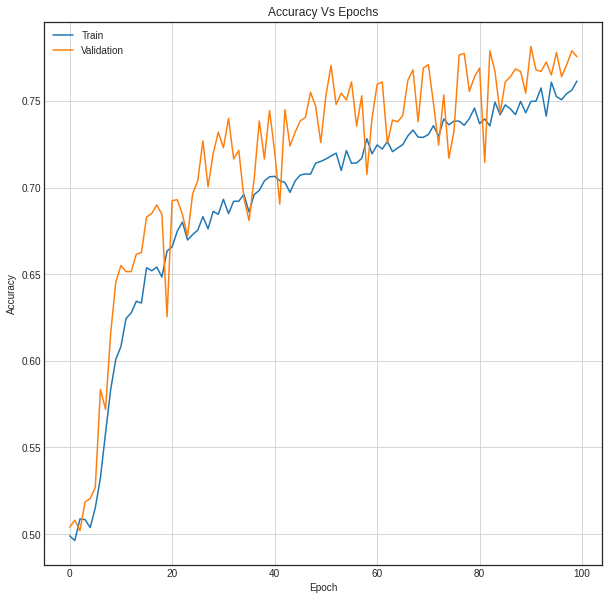

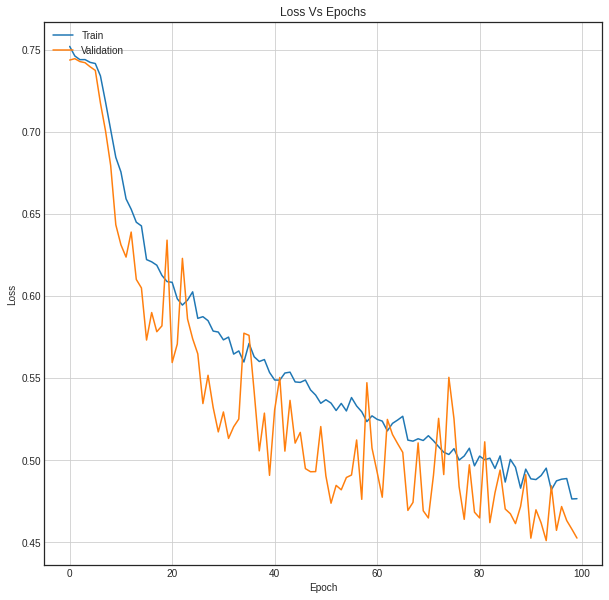

Time Model_Xu_Net_04WOW1 = 3944.00785446167 [seconds]


In [42]:
model= Xu_Net()
name="Model_"+m_name+"_"+base_name
_, history  = train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size=32, epochs=100, model_name=name)

Our main contribution was to add the DCT filter along with the three extra CNN layers at start. To read more about it follow the link : https://drive.google.com/file/d/1PsBQcMXg_UOpUkImk-UWD2rzteNxcrj6/view?usp=sharing

## Finance




### Stock Market Trading
Many people purchase stocks, and often they do it based on recent trends, and sentiment about a specific company, and they use this information to predict when to buy/sell stocks. This is when you could use recurrent neural networks(RNN’s) for sentiment analysis. We could look through the internet and find articles of a particular company by searching for the company’s name! Then we can take subsections of the beginning, middle, and end and assess their sentiment and give investors an accurate notification of when to buy or sell a particular stock.

## Recurrent Neural Networks
In a recurrent neural network we store the output activations from one or more of the layers of the network. Often these are hidden later activations. Then, the next time we feed an input example to the network, we include the previously-stored outputs as additional inputs. You can think of the additional inputs as being concatenated to the end of the “normal” inputs to the previous layer. For example, if a hidden layer had 10 regular input nodes and 128 hidden nodes in the layer, then it would actually have 138 total inputs (assuming you are feeding the layer’s outputs into itself à la Elman) rather than into another layer). Of course, the very first time you try to compute the output of the network you’ll need to fill in those extra 128 inputs with 0s or something.

Source: [Quora](https://www.quora.com/What-is-a-simple-explanation-of-a-recurrent-neural-network)
<img src="https://cdn-images-1.medium.com/max/1600/1*NKhwsOYNUT5xU7Pyf6Znhg.png">

Source: [Medium](https://medium.com/ai-journal/lstm-gru-recurrent-neural-networks-81fe2bcdf1f9)


Now, even though RNNs are quite powerful, they suffer from  **Vanishing gradient problem ** which hinders them from using long term information, like they are good for storing memory 3-4 instances of past iterations but larger number of instances don't provide good results so we don't just use regular RNNs. Instead, we use a better variation of RNNs: **Long Short Term Networks(LSTM).**

### What is Vanishing Gradient problem?
Vanishing gradient problem is a difficulty found in training artificial neural networks with gradient-based learning methods and backpropagation. In such methods, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range (0, 1), and backpropagation computes gradients by the chain rule. This has the effect of multiplying n of these small numbers to compute gradients of the "front" layers in an n-layer network, meaning that the gradient (error signal) decreases exponentially with n while the front layers train very slowly.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Vanishing_gradient_problem)

<img src="https://cdn-images-1.medium.com/max/1460/1*FWy4STsp8k0M5Yd8LifG_Q.png">

Source: [Medium](https://medium.com/@anishsingh20/the-vanishing-gradient-problem-48ae7f501257)

## Long Short Term Memory(LSTM)
Long short-term memory (LSTM) units (or blocks) are a building unit for layers of a recurrent neural network (RNN). A RNN composed of LSTM units is often called an LSTM network. A common LSTM unit is composed of a cell, an input gate, an output gate and a forget gate. The cell is responsible for "remembering" values over arbitrary time intervals; hence the word "memory" in LSTM. Each of the three gates can be thought of as a "conventional" artificial neuron, as in a multi-layer (or feedforward) neural network: that is, they compute an activation (using an activation function) of a weighted sum. Intuitively, they can be thought as regulators of the flow of values that goes through the connections of the LSTM; hence the denotation "gate". There are connections between these gates and the cell.

The expression long short-term refers to the fact that LSTM is a model for the short-term memory which can last for a long period of time. An LSTM is well-suited to classify, process and predict time series given time lags of unknown size and duration between important events. LSTMs were developed to deal with the exploding and vanishing gradient problem when training traditional RNNs.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

<img src="https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.">

Source: [Medium](https://codeburst.io/generating-text-using-an-lstm-network-no-libraries-2dff88a3968)

The best LSTM explanation on internet: https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235



## Components of LSTMs
So the LSTM cell contains the following components
* Forget Gate “f” ( a neural network with sigmoid)
* Candidate layer “C"(a NN with Tanh)
* Input Gate “I” ( a NN with sigmoid )
* Output Gate “O”( a NN with sigmoid)
* Hidden state “H” ( a vector )
* Memory state “C” ( a vector)

* Inputs to the LSTM cell at any step are X<sub>t</sub> (current input) , H<sub>t-1</sub> (previous hidden state ) and C<sub>t-1</sub> (previous memory state).  
* Outputs from the LSTM cell are H<sub>t</sub> (current hidden state ) and C<sub>t</sub> (current memory state)

Since I am a stock market enthusiast, I will use LSTMs for predicting the price of stocks of Apple of the year 2017 using the past data

In [43]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [44]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [45]:
# First, we get the data
dataset = pd.read_csv('../input/stock-time-series-20050101-to-20171231/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [46]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

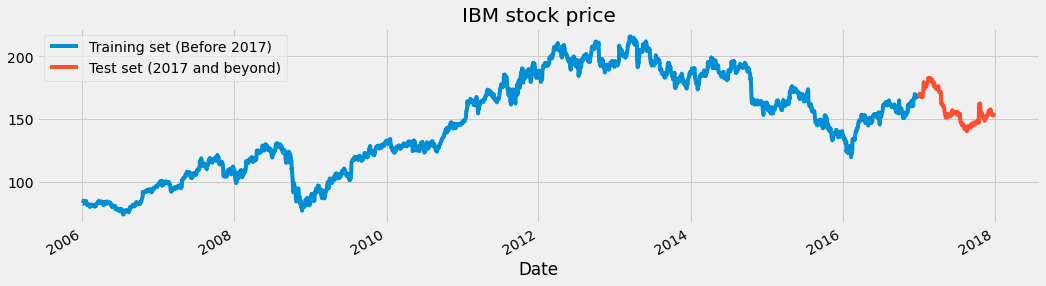

In [47]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [48]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [49]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2767):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [50]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [51]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0247
Epoch 2/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0105
Epoch 3/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0086
Epoch 4/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0074
Epoch 5/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0065
Epoch 6/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0055
Epoch 7/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0047
Epoch 8/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0046
Epoch 9/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0043
Epoch 10/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0041
Epoch 11/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0037
Epoch 12/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0035
Epoch 13/100
85/85 [=====

In [52]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [53]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

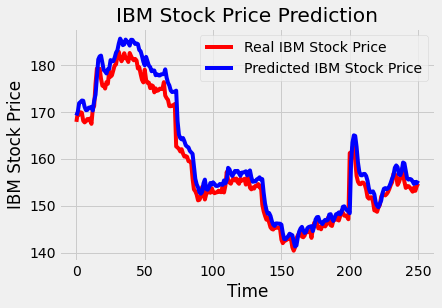

In [54]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [55]:
# Evaluating our model
return_rmse(test_set,predicted_stock_price)

The root mean squared error is 2.7121103723162383.


# References


[1] https://towardsdatascience.com/how-to-build-your-own-neural-network-from-scratch-in-python-68998a08e4f6

[2] https://towardsdatascience.com/over-fitting-and-regularization-64d16100f45c

[3] https://emerj.com/ai-sector-overviews/machine-learning-in-robotics/

[4] https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

[5] https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

[6] https://machinelearningmastery.com/implement-backpropagation-algorithm-scratch-python/

[7] https://www.nature.com/articles/s41563-019-0360-1

[8] https://medium.com/@ocktavia/titanic-prediction-with-artificial-neural-network-in-r-5dd20fb98dea

[9] https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

[10] https://towardsdatascience.com/what-is-a-perceptron-210a50190c3b

